In [ ]:
# Install matplotlib extension for Venn diagrams
# Run following command from the notebook

# !pip install matplotlib-venn

# Docs: https://pypi.org/project/matplotlib-venn/

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

In [16]:
data = pd.read_csv('/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/mosquito_abundance.csv',
                  skiprows=1,
                  sep=",")

data.head(5)

,Species,sweden_farms,sweden_peri_urban,sweden_wetlands,netherlands_farms,netherlands_peri_urban,netherlands_wetlands,italy_farms,italy_peri_urban,italy_wetlands
0,Aedes albopictus,0,0,0,0,0,0,37,272,4
1,Aedes behningi,0,2,13,0,0,0,0,0,1
2,Aedes berlandi,0,0,0,0,0,0,0,1,0
3,Aedes cantans,0,4,3,0,0,0,0,0,0
4,Aedes caspius,0,1,0,0,0,0,5,9,1664


In [62]:
total_farms = data.sweden_farms + data.netherlands_farms + data.italy_farms
idx_farms = (total_wetland == 0) & (total_farms > 0) & (total_periurban == 0)
farms = data.Species[idx_farms]

total_periurban = data.sweden_peri_urban + data.netherlands_peri_urban + data.italy_peri_urban
idx_periurban = (total_wetland == 0) & (total_farms == 0) & (total_periurban > 0)
periurban = data.Species[idx_periurban]

total_wetland = data.sweden_wetlands + data.netherlands_wetlands + data.italy_wetlands
idx_wetland = (total_wetland > 0) & (total_farms == 0) & (total_periurban == 0)
wetland = data.Species[idx_wetland]

idx_farm_wetland = (total_wetland > 0) & (total_farms > 0) & (total_periurban == 0)
farm_wetland = data.Species[idx_farm_wetland]

idx_farm_periurban = (total_wetland == 0) & (total_farms > 0) & (total_periurban > 0)
farm_periurban = data.Species[idx_farm_periurban]

idx_wetland_periurban = (total_wetland > 0) & (total_farms == 0) & (total_periurban > 0)
wetland_periurban = data.Species[idx_wetland_periurban]

idx_farm_wetland_periurban = (total_wetland > 0) & (total_farms > 0) & (total_periurban > 0)
farm_wetland_periurban = data.Species[idx_farm_wetland_periurban]


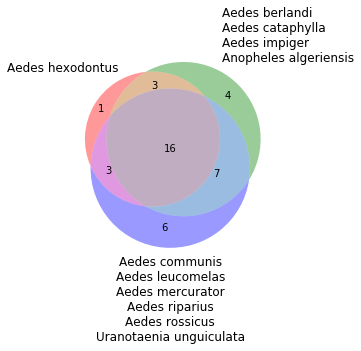

In [74]:
# A, B, AB, C, AC, BC, ABC
v = venn3(subsets=(farms.size, 
                   periurban.size,
                   farm_periurban.size,
                   wetland.size,
                   farm_wetland.size,
                   wetland_periurban.size,
                   farm_wetland_periurban.size), 
          set_labels = ('\n'.join(data.Species[idx_farms].values), 
                        '\n'.join(data.Species[idx_periurban].values), 
                        '\n'.join(data.Species[idx_wetland].values)))